# Introduction to A/B Testing

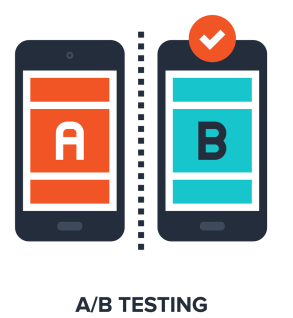

# What is AB Testing

### A/B test: an experiment where you…

- Test two or more variants against one another
- to evaluate which one performs best
- in the context of a randomized experiment

### The importance of randomness

#### Random assignment helps to…
- Isolate the impact of the change made
- Reduce the potential impact of confounding variables
- Using an assignment criteria may introduce <b>confounders</b>

# Why AB Testing?

- No guessing
- Provides accurate answers - quickly
- Allows to rapidly iterate on ideas and establish causal relationships

### Bad Problems for A/B Testing

- Cases with network effects among users
    - Challenging to segment the users into groups
    - Difficult to untangle the impact of the test

### Good Problems for A/B Testing

- Users are impacted individually
- Testing changes that can directly impact their behavior

# A/B Test Process

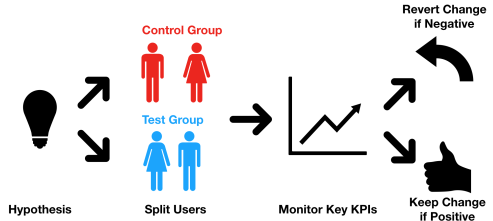

- Develop a hypothesis about your product or business
- Randomly assign users to two different groups(Control & Test)
- Expose Control Group to the current product rules
- Expose Test Group to the product that tests hypothesis
- Monitor Key Performance Indicators for both the groups
- Accept/Reject the hypothesis based on statistical significance of the results.

# Our Goal - increase our app's revenue with A/B Testing

### Specific Goal
 - Test change to our consumer purchase paywall to...
 - increase revenue by increasing the purchase rate

### Question: Which paywall has a higher conversion rate?

- <b> Current Paywall:</b> ”I hope you enjoyed your free-trial, please consider subscribing” (control)
- <b> Proposed Paywall:</b> “Your free-trial has ended, don’t miss out, subscribe today!” (treatment)

# Control Group and Treatment(Test) Group

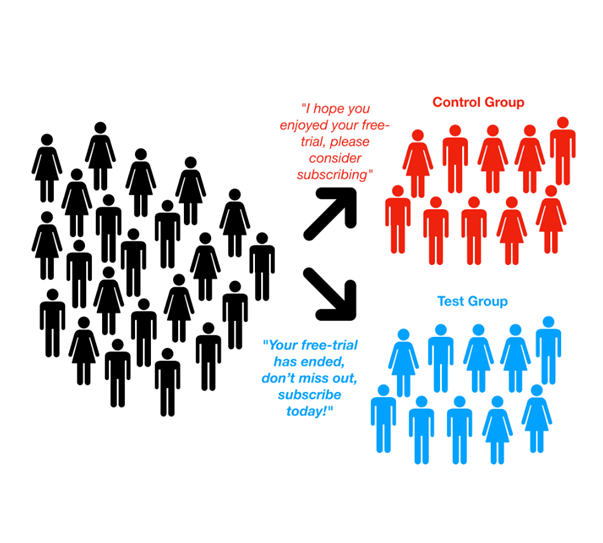

# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Our data set

In [7]:
purchase_data = pd.read_csv('dataset/purchase_data.csv')
purchase_data.sample(n=5)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
35256,98501896,2016-06-15T00:00:00Z,and,M,BRA,20,2016-08-08,NaN,NaN,0
16430,69359991,2016-07-05T00:00:00Z,and,F,DEU,28,2017-01-24,sku_two_299,299.0,1
99208,94512311,2017-07-13T00:00:00Z,and,M,USA,15,2017-09-05,NaN,NaN,0
118918,81329636,2017-08-02T00:00:00Z,and,F,USA,18,2017-11-03,NaN,NaN,0
79475,13118373,2017-11-23T00:00:00Z,and,F,DEU,51,2017-12-28,NaN,NaN,0


# EDA

In [8]:
purchase_data.sku.value_counts()

sku_two_299       1968
sku_three_499     1877
sku_four_599      1848
sku_one_199       1840
sku_six_1299       379
sku_five_899       372
sku_seven_1499     365
sku_eight_2099     357
Name: sku, dtype: int64

In [9]:
purchase_data.device.value_counts()

and    84345
iOS    56861
Name: device, dtype: int64

In [10]:
daily_visitor_data = purchase_data.groupby(by=['date'], as_index=False)
daily_visitor_data = daily_visitor_data.agg({'purchase': ['sum', 'count']})
daily_visitor_data.columns = daily_visitor_data.columns.droplevel(level=0)
daily_visitor_data.columns = ['date', 'sum', 'count']

In [11]:
# Group and aggregate our combined dataset 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])
purchase_summary = grouped_purchase_data.agg({'purchase': ['sum', 'count']})
purchase_summary.head()

purchase       
                   sum  count
device gender                
and    F          2804  46304
       M          2541  38041
iOS    F          1987  29687
       M          1674  27174

# Initial A/B test design

### Factors & variants

<b> Factors:</b> The type of variable you are changing
- The paywall customer greeting <br>

<b>Variants:</b> Particular changes you are testing
- Current Paywall: “I hope you enjoyed your free-trial, please consider subscribing” (control)
- Proposed Paywall: “Your free-trial has ended, don’t miss out, subscribe today!” (treatment)

### Response variable

- The quantity used to measure the impact of your change
- Should either be a KPI or directly related to a KPI
- The easier to measure the better

### Choosing a KPI:
- Stability over time
- Importance across different user groups
- Correlation with other business factors

### How to identify KPIs
- Experience + Domain knowledge + Exploratory data analysis

- Experience & Knowledge - What is important to a business

- Exploratory Analysis - What metrics and relationships impact these KPIs

### KPI: Conversion Rate

- <b>Conversion Rate:</b> Percentage of users who subscribe after the free trial
    - Across all users or just a subset?
    - Of users who convert within one week? One month?

### Why is conversion rate important?
- Strong measure of growth
- Potential early warning sign of problems
- Sensitive to changes in the overall ecosystem


In [12]:
purchase_data.head(5)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,NaN,NaN,0
1,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,sku_two_299,299.0,1
2,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-31,NaN,NaN,0
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-01,NaN,NaN,0
4,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-09,NaN,NaN,0


In [13]:
# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})
daily_purchase_data.sample(n=5)

date purchase      
                      sum count
422   2016-05-15        3    38
95    2015-06-23        1     5
1128  2018-04-21       15    15
962   2017-11-06       16   303
189   2015-09-25        1     8

In [14]:
# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000
conversion_rate = daily_purchases/daily_paywall_views

print('Daily Views: {:,.2f}' .format(daily_paywall_views))
print('Daily Purchases: {:,.2f}' .format(daily_purchases))
print('Conversion Rate: {:,.4f}' .format(conversion_rate))

Daily Views: 125,071.74
Daily Purchases: 7,976.97
Conversion Rate: 0.0638


# Test sensitivity

 - <b>First Question:</b>  What size of impact is meaningful to detect
 
      - 1%... ?
      - 20%.. ?
      
 - Smaller changes = more difficult to detect
     - can be hidden by randomness
     
     
 - <b>Sensitivity :</b> The minimum level of changes we want to be able to detect in our test
     - Evaluate different sensitivity values

## Evaluating different sensitivities

In [15]:
small_sensitivity = 0.01 

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + small_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print('Conversion Rate: {:,.4f}' .format(small_conversion_rate))
print('Daily Purchases: {:,.2f}' .format(small_purchasers))
print('Purchase Lift: {:,.2f}' .format(purchaser_lift))

Conversion Rate: 0.0644
Daily Purchases: 8,056.74
Purchase Lift: 79.77


In [16]:
medium_sensitivity = 0.1 

# Find the conversion rate when increased by the percentage of the sensitivity above
medium_conversion_rate = conversion_rate * (1 + medium_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print('Conversion Rate: {:,.4f}' .format(medium_conversion_rate))
print('Daily Purchases: {:,.2f}' .format(medium_purchasers))
print('Purchase Lift: {:,.2f}' .format(purchaser_lift))

Conversion Rate: 0.0702
Daily Purchases: 8,774.67
Purchase Lift: 797.70


In [17]:
large_sensitivity = 0.5

# Find the conversion rate when increased by the percentage of the sensitivity above
large_conversion_rate = conversion_rate * (1 + large_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = large_purchasers - daily_purchases


print('Conversion Rate: {:,.4f}' .format(large_conversion_rate))
print('Daily Purchases: {:,.2f}' .format(large_purchasers))
print('Purchase Lift: {:,.2f}' .format(purchaser_lift))

Conversion Rate: 0.0957
Daily Purchases: 11,965.46
Purchase Lift: 3,988.49


# Data variability

 - Important to understand the variability in your data
 - Does the conversion rate vary a lot among users?
    - If it does not then it will be easier to detect a change

# Standard error

Here, we will explore how to calculate standard error for a conversion rate. We will calculate this step by step in this exercise.

In [18]:
# Find the number of paywall views 
n = purchase_data.purchase.count()

# Calculate the quantitiy "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n 
se = var**0.5

print('Variance:', var)
print('Standard Error:', se)

Variance: 4.2286714683499174e-07
Standard Error: 0.0006502823593140073


# Calculating the sample size of our test
***

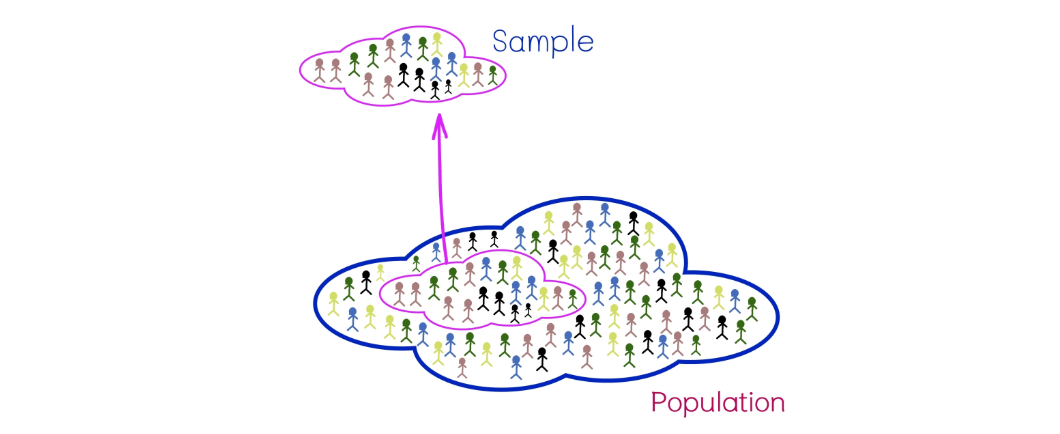

# Null hypothesis

- Hypothesis that control & treatment have the same impact on the response
    - Updated paywall does not improve conversion rate
    - Any observed difference is due to randomness

- Rejecting the Null Hypothesis
    - Determine their is a improvement in the conversion rate
    - Statistically significant result

# Types of error & confidence level

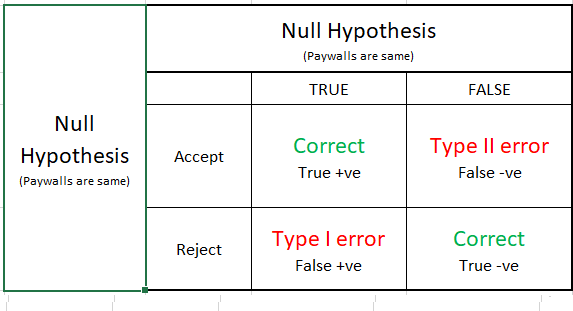

- <b> Type I error:</b> Rejecting the null hypothesis, when it is true
- <b> Type II error:</b> Retaining the false null hypothesis
- <b> Confidence level:</b> Probability of <b>NOT</b> making a Type I error. Higher the value, larger test sample needed. Commonly accepted value is 0.95

# Statistical Power

<b>Statistical Power: </b> Probability of finding a statistically significant result when the Null Hypothesis is False

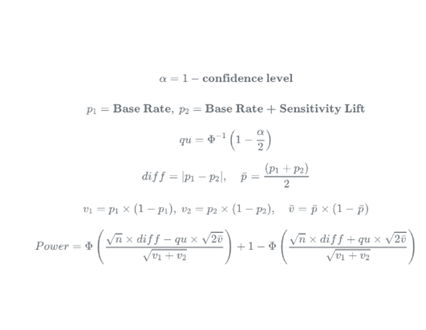

- Sample size increases = Power increases
- Confidence level increases = Power decreases

In [19]:
#Function to calculate Statistical Power
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

# Connecting the Different Components

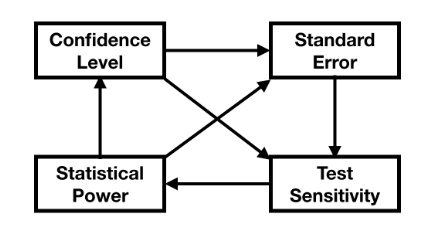

- Estimate our needed sample size from:
    - needed level of sensitivity
    - our desired test power & confidence level

# Calculating the sample size

To reach statistical significance, our sample size should be enough.<br> To estimate our needed sample size, we can choose our desired sensitivity, set our desired confidence level & power, and then estimate our standard error using these values

In [20]:
# Function to calculate sample size
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)
        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100
    return "Increase Max N Value"

In [21]:
power = 0.8
cl = 0.95
percent_lift = 0.1
conversion_rate_p2 = conversion_rate * (1 + percent_lift)
get_sample_size(power, conversion_rate, conversion_rate_p2, cl)

24201

In [22]:
# Validate
get_power(24200, conversion_rate, conversion_rate_p2, cl)

0.8014367446691095

# Decreasing the needed sample size

- Choose a unit of observation with lower variability.
- Excluding users irrelevant to the process/change.
- Think through how different factors relate to the sample size.

# Analyzing the A/B test results
***

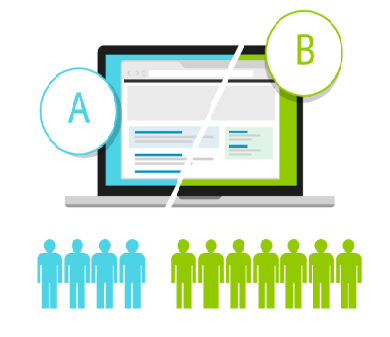

## Evaluating our test results

We ran our test for the specified amount of time. Now, we have to confirm that everything ran correctly for an A/B test. The checks we will perform will allow us to confidently report any results we uncover.

In [23]:
purchase_data.head(5)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,NaN,NaN,0
1,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,sku_two_299,299.0,1
2,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-31,NaN,NaN,0
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-01,NaN,NaN,0
4,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-09,NaN,NaN,0


In [26]:
user_table = purchase_data[['uid']]
user_table = user_table.drop_duplicates().reset_index(drop=True)
print('Unique number of users:',user_table.uid.nunique())

Unique number of users: 1322


In [29]:
# Divide into test and control group
length = len(user_table['uid'])
np.random.seed(1)
k = np.random.binomial(1, 0.495, length)
user_table['group'] = k 
user_table['group'] = user_table['group'].replace(0, 'Control', regex=True)
user_table['group'] = user_table['group'].replace(1, 'Test', regex=True)
user_table.head(n=4)

,uid,group
0,92513925,Control
1,16377492,Test
2,36350096,Control
3,13373345,Control


In [30]:
purchase_data = pd.merge(purchase_data, user_table[['uid','group']], how='left', on ='uid')
purchase_data.head()

,uid,reg_date,device,gender,country,age,date,sku,price,purchase,group
0,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,NaN,NaN,0,Control
1,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,sku_two_299,299.0,1,Control
2,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-31,NaN,NaN,0,Control
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-01,NaN,NaN,0,Control
4,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-06-09,NaN,NaN,0,Control


### Make sure there is no bias in our assignment procedure

In [31]:
# Find the unique users in each group 
results = purchase_data.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(purchase_data.uid.unique()) 

# Find the percentage in each group
results = results / unique_users * 100
print('Percentage of users in each group:','\n', results)

Percentage of users in each group: 
                uid
group             
Control  49.546142
Test     50.453858


In [32]:
# Find the unique users in each group, by device and gender
results = purchase_data.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(purchase_data.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print('Percentage of users in each group:','\n')
results

Percentage of users in each group: 



uid
group   device gender           
Control and    F       16.717095
               M       12.859304
        iOS    F        9.379728
               M       10.590015
Test    and    F       16.187595
               M       13.993949
        iOS    F       11.573374
               M        8.698941

### Test and control group conversion rates

In [33]:
test_results_summary = purchase_data.groupby(
    by=['group'], as_index=False
).agg({'purchase':['count','sum']})

# Calculate our paywall conversion rates by group
test_results_summary['conv'] = (test_results_summary.purchase['sum'])/(test_results_summary.purchase['count'])
test_results_summary

group purchase            conv
              count   sum          
0  Control    69791  4291  0.061484
1     Test    71415  4715  0.066023

# Is the result statistically significant?

 - <b> Statisitical Significance </b> Are the conversion rates different enough?
     - If yes, then we reject the null hypothesis - <b> Conclude that the paywall's have different effects</b>
     - If no, then it may be just randomness

### p - values

- probability if the Null Hypothesis is true...
- of observing a value as or more extreme than the one we observed
- <b>Low p-values</b>
    - represent potentially significant results
    - the observation is unlikely to have happened due to randomness

### Interpreting p-values


- <b>Typically:</b> accept or reject hypothesis based on p-value
- Below table shows the general rule of thumb:

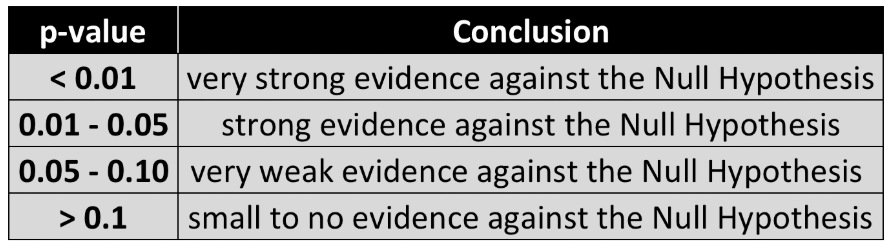

In [34]:
def get_pvalue(con_conv, test_conv, con_size, test_size):
    lift = -abs(test_conv - con_conv)
    
    scale_one = con_conv * (1-con_conv) * (1/ con_size)
    scale_two = test_conv * (1-test_conv) * (1/ test_size)
    scale_val = (scale_one + scale_two) ** 0.5
    
    p_value = 2 * stats.norm.cdf(lift, loc=0, scale = scale_val)  
    return p_value

In [35]:
cont_conv = test_results_summary[test_results_summary['group']=='Control']['conv'].iloc[0]
test_conv = test_results_summary[test_results_summary['group']=='Test']['conv'].iloc[0]
cont_size = test_results_summary[test_results_summary['group']=='Control']['purchase']['count'].iloc[0]
test_size = test_results_summary[test_results_summary['group']=='Test']['purchase']['count'].iloc[0]
p_value = get_pvalue(cont_conv, test_conv, cont_size, test_size)
p_value

0.00048076191482886215

In [36]:
# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

Significant Result


# What's a confidence interval

Range of values for our estimation rather than single number
Provides context for our estimation process
Series of repeated experiments...
the calculated intervals will contain the true parameter X% of the time
The true conversion rate is a fixed quantity, our estimation and the interval are variable

# Calculating confidence intervals

In [37]:
def get_ci(value, cl, sd):
    loc = stats.norm.ppf(1 - cl/2)
    rng_val = stats.norm.cdf(loc - value/sd)

    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val 
  
    return_val = (lwr_bnd, upr_bnd)
    return(return_val)

In [38]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv 

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv / test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print('lift_mean = ', lift_mean)
print('confidence_interval = ', confidence_interval)

lift_mean =  0.004538971903020966
confidence_interval =  (0.004235559591314024, 0.004842384214727909)


# Factors to communicate

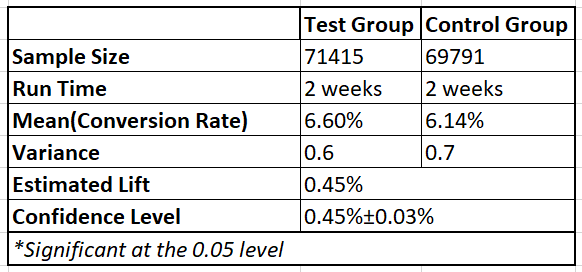

# Plotting the distribution

Here, we will visualize the test and control conversion rates as distributions. Additionally, viewing the data in this way can give a sense of the variability inherent in our estimation.

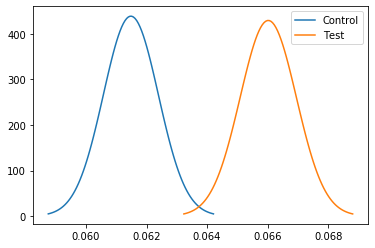

In [39]:
# Compute the variance
cont_var = (cont_conv * (1 - cont_conv)) / cont_size
test_var = (test_conv * (1 - test_conv)) / test_size

# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd ,test_conv +  3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, stats.norm.pdf(control_line, cont_conv, control_sd), label='Control')
plt.plot(test_line, stats.norm.pdf(test_line, test_conv, test_sd), label='Test')
plt.legend()
plt.show()

# Plotting the difference distribution

Now lets plot the difference distribution of our results that is, the distribution of our lift.

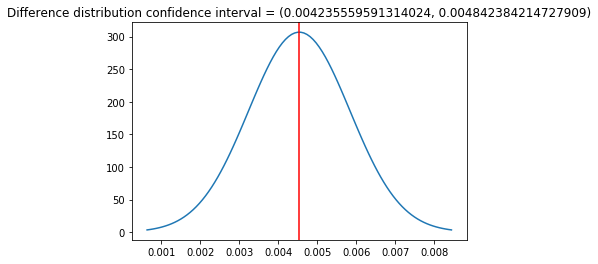

In [40]:
# Find the lift mean and standard deviation
sizes = [test_conv, cont_conv]
lift_mean = max(sizes) - min(sizes)
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)

# Plot the lift distribution
plt.plot(lift_line, stats.norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'r')
plt.title(f'Difference distribution confidence interval = {confidence_interval}')
plt.show()